## Exploratory Analysis
<br>
Guiding Questions
* What proportions do teams pass vs run, are there any treads related to this with QB's and RB's
* Has the league changed over the years and how so
* Are there any interesting relationships between statistics of the same category
* What type of statistics are common among winning teams 

In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.options.mode.chained_assignment = None
np.warnings.filterwarnings('ignore')

In [2]:
#Get player stats
player_stats = pd.read_csv('C:\\Users\\Louie\\Repositories\\Springboard\\Capstone 1 - NFL Matchup Predictions\\Data Wrangling\\Data\\players.csv')
player_stats.head()

,year,team,pass_to_run,completion_perc,pass_len,interceptions_turnover,pass_touchdowns,rush_touchdowns,running_back_avg,rec_max_touchdowns,max_yards_per_catch,rec_yards_max,rec_spread,max_sacks,max_tackles,sacks,int_take,forced_fumbles,qb_pass_to_run,rb_run_to_catch
0,2009,ARI,0.62,0.66,10.70,18,28,15,4.51,13,12.95,1092,19.39,8,90,46,21,9,0.96,0.94
1,2009,ATL,0.56,0.58,11.14,17,26,15,4.89,11,13.56,1153,26.70,7,103,30,15,17,0.94,0.97
2,2009,BAL,0.52,0.63,11.33,13,21,22,5.27,7,14.12,1028,23.09,7,94,34,22,13,0.94,0.77
3,2009,BUF,0.51,0.58,10.89,19,17,6,4.46,7,15.07,829,12.14,11,87,34,28,12,0.88,0.84
4,2009,CAR,0.47,0.57,11.63,20,16,18,5.13,7,20.17,982,18.27,11,112,33,22,20,0.95,0.92


In [3]:
#Get team stats
team_stats = pd.read_csv('C:\\Users\\Louie\\Repositories\\Springboard\\Capstone 1 - NFL Matchup Predictions\\Data Wrangling\\Data\\teams.csv')
team_stats.head()

,year,team,pyds,ryds,totfd,trnovr,pen
0,2009,ARI,4021,1489,317,36,108
1,2009,ATL,3571,1876,330,25,78
2,2009,BAL,3413,2206,320,22,115
3,2009,BUF,2515,1867,233,30,107
4,2009,CAR,2799,2498,289,31,88


In [4]:
#Merge for correlation
all_stats = player_stats.merge(team_stats, on=['year','team'])
all_stats.head()

,year,team,pass_to_run,completion_perc,pass_len,interceptions_turnover,pass_touchdowns,rush_touchdowns,running_back_avg,rec_max_touchdowns,...,sacks,int_take,forced_fumbles,qb_pass_to_run,rb_run_to_catch,pyds,ryds,totfd,trnovr,pen
0,2009,ARI,0.62,0.66,10.70,18,28,15,4.51,13,...,46,21,9,0.96,0.94,4021,1489,317,36,108
1,2009,ATL,0.56,0.58,11.14,17,26,15,4.89,11,...,30,15,17,0.94,0.97,3571,1876,330,25,78
2,2009,BAL,0.52,0.63,11.33,13,21,22,5.27,7,...,34,22,13,0.94,0.77,3413,2206,320,22,115
3,2009,BUF,0.51,0.58,10.89,19,17,6,4.46,7,...,34,28,12,0.88,0.84,2515,1867,233,30,107
4,2009,CAR,0.47,0.57,11.63,20,16,18,5.13,7,...,33,22,20,0.95,0.92,2799,2498,289,31,88


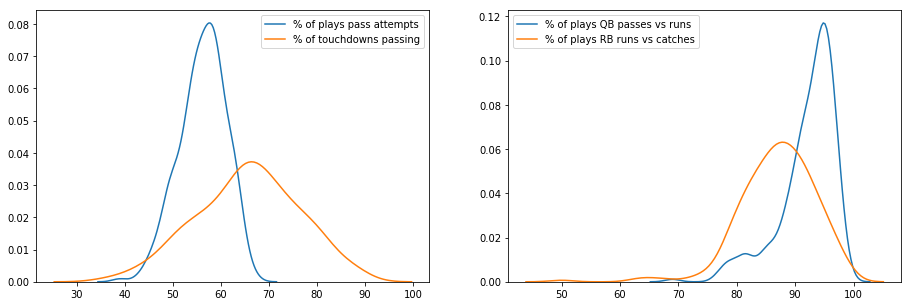

In [5]:
#Formatting config
f, axes = plt.subplots(1, 2)
fig = plt.gcf()
fig.set_size_inches(15.5, 5.0)

#Distributions of passing to running ratio
perc_pass_tds = player_stats['pass_touchdowns'].divide(player_stats['rush_touchdowns'] + player_stats['pass_touchdowns']).round(2)
sns.kdeplot(player_stats['pass_to_run'] * 100,label="% of plays pass attempts", ax=axes[0])
sns.kdeplot(perc_pass_tds * 100,label="% of touchdowns passing", ax=axes[0])

#QB and RB style distributions
sns.kdeplot(player_stats['qb_pass_to_run'] * 100,label="% of plays QB passes vs runs", ax=axes[1])
sns.kdeplot(player_stats['rb_run_to_catch'] * 100,label="% of plays RB runs vs catches", ax=axes[1])

Passing vs Running Play Composition (Left)
* Passing is the predominant form of playstyle and most common method for scoring touchdowns
* Normally distributed meaning play styles seem to be part of a spectrum not discrete groups

<br>

Passing vs Running Player Composition (Right)
* Specialized postitions such as RB and QB have a high percentage of one type of play style
* Seems to be a group of QB's which run significantly more often than others, around 80%

<br>
<br>

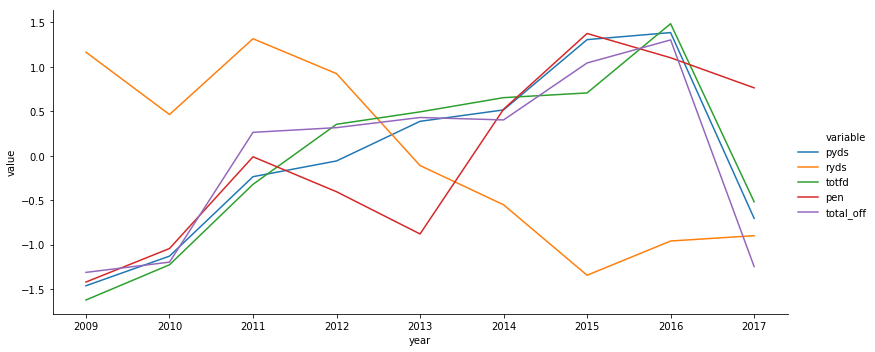

In [6]:
#Get team statistic trends by year

team_stats['total_off'] = team_stats['pyds'] + team_stats['ryds']

year_stats = team_stats.groupby(['year'])['pyds','ryds','totfd','trnovr','pen','total_off'].sum()
norm_year_stats = ((year_stats - year_stats.mean())/year_stats.std()).reset_index()

line_date = pd.melt(norm_year_stats, id_vars=['year'], value_vars=['pyds','ryds','totfd','pen','total_off'])

sns.relplot(y="value", x="year", kind='line', hue='variable', data=line_date, aspect=18.5/8.27);

* Strong correlation between passing, first downs, and total offense
* Penalties have been increasing the past 8 years
* Rushing has been decreasing past 8 years
* Last year produced low offensive numbers

<br>
<br>


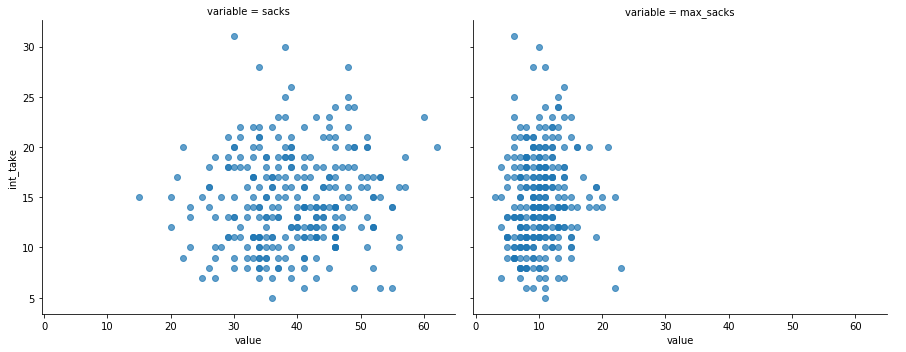

In [7]:
#Correlation between sacks and interceptions

interceptions_to_sacks = pd.melt(player_stats[['int_take','sacks','max_sacks']], id_vars=['int_take'])

g = sns.FacetGrid(interceptions_to_sacks, col="variable", aspect=10/8, height=5)
g.map(plt.scatter, "value", "int_take", alpha=.7)
g.add_legend();

* There seems to be no real correlation between sacks and interceptions
* Also having an excellent pass rusher does not seem to effect interception levels either

<br>
<br>

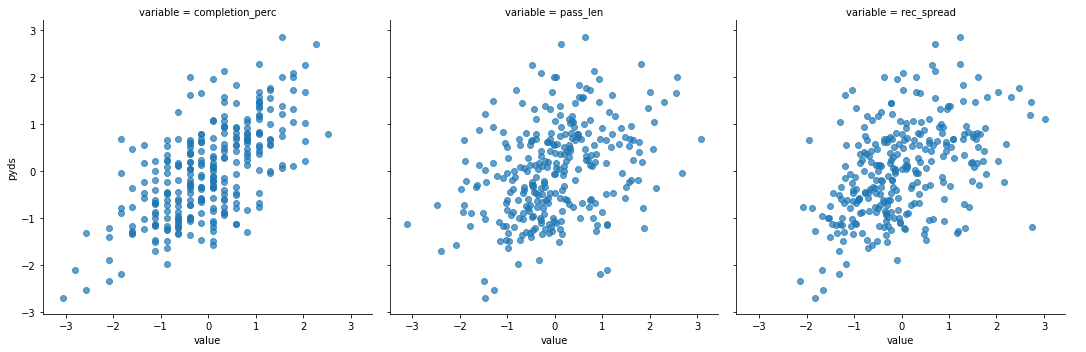

In [9]:
#Passing to interceptions thrown correlation

#Prepare data
p0 = all_stats[['pyds','completion_perc','pass_len','rec_spread']]
p1 = ((p0 - p0.mean())/p0.std())
p = pd.melt(p1, id_vars=['pyds'])

#Graph
g = sns.FacetGrid(p, col="variable", aspect=1, height=5)
g.map(plt.scatter, "value", "pyds", alpha=.7)
g.add_legend()

* Correlations to performance in passing can be seen for completion percentage, passing length, and spreading the ball between recievers
* Correlation is seen strongest in completion percentage though

<br>
<br>

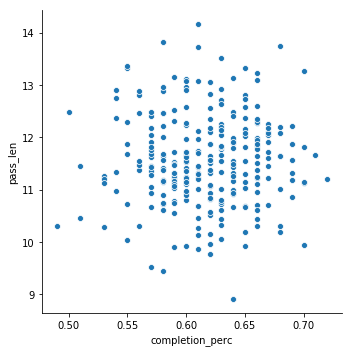

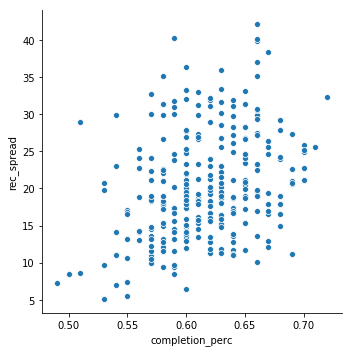

In [10]:
#Investigate relationship between completion percentage and completion length
sns.relplot(y="pass_len", x="completion_perc", data=p0, aspect=1)
sns.relplot(y="rec_spread", x="completion_perc", data=p0, aspect=1)

* No correlation seen between completion percentage and completion length
* However passing to many wide recievers does correlate with completion percentage

<br>
<br>

In [36]:
#Get game data
game_stats = pd.read_csv('C:\\Users\\Louie\\Repositories\\Springboard\\Capstone 1 - NFL Matchup Predictions\\Data Wrangling\\Data\\nfl_matchups.csv')
del game_stats['home']
del game_stats['away']
game_stats.head()

,home_score,away_score,diff,home_win,week,pyds_home,ryds_home,totfd_home,trnovr_home,pen_home,...,max_yards_per_catch_away,rec_yards_max_away,rec_spread_away,max_sacks_away,max_tackles_away,sacks_away,int_take_away,forced_fumbles_away,qb_pass_to_run_away,rb_run_to_catch_away
0,13,10,3,1,1,4148,1790,331,26,85,...,16.69,701,9.91,6,93,33,20,13,0.82,0.88
1,17,20,-3,0,11,4650,1475,340,28,95,...,16.69,701,9.91,6,93,33,20,13,0.82,0.88
2,27,17,10,1,13,4515,1294,339,24,74,...,16.69,701,9.91,6,93,33,20,13,0.82,0.88
3,13,17,-4,0,17,3503,1566,297,31,95,...,16.69,701,9.91,6,93,33,20,13,0.82,0.88
4,59,0,59,1,6,4436,1921,373,22,81,...,16.69,701,9.91,6,93,33,20,13,0.82,0.88


In [33]:
game_clean = ((game_stats - game_stats.mean())/game_stats.std())
game_clean.head()

,home_score,away_score,diff,home_win,week,pyds_home,ryds_home,totfd_home,trnovr_home,pen_home,...,max_yards_per_catch_away,rec_yards_max_away,rec_spread_away,max_sacks_away,max_tackles_away,sacks_away,int_take_away,forced_fumbles_away,qb_pass_to_run_away,rb_run_to_catch_away
0,-1.031016,-1.136790,0.035356,0.866625,-1.612155,0.722913,-0.062498,0.459664,0.209758,-1.073982,...,0.117357,-1.278968,-1.470202,-1.200651,0.738672,-0.774529,1.112579,0.14394,-2.092377,0.154524
1,-0.644824,-0.121994,-0.369982,-1.153383,0.384427,1.550004,-1.027514,0.706949,0.516136,-0.460766,...,0.117357,-1.278968,-1.470202,-1.200651,0.738672,-0.774529,1.112579,0.14394,-2.092377,0.154524
2,0.320655,-0.426433,0.508251,0.866625,0.783744,1.327579,-1.582014,0.679473,-0.096621,-1.748520,...,0.117357,-1.278968,-1.470202,-1.200651,0.738672,-0.774529,1.112579,0.14394,-2.092377,0.154524
3,-1.031016,-0.426433,-0.437538,-1.153383,1.582376,-0.339783,-0.748731,-0.474525,0.975703,-0.460766,...,0.117357,-1.278968,-1.470202,-1.200651,0.738672,-0.774529,1.112579,0.14394,-2.092377,0.154524
4,3.410190,-2.151587,3.818514,0.866625,-0.613864,1.197420,0.338825,1.613662,-0.402999,-1.319268,...,0.117357,-1.278968,-1.470202,-1.200651,0.738672,-0.774529,1.112579,0.14394,-2.092377,0.154524


(-0.25, 0.25)

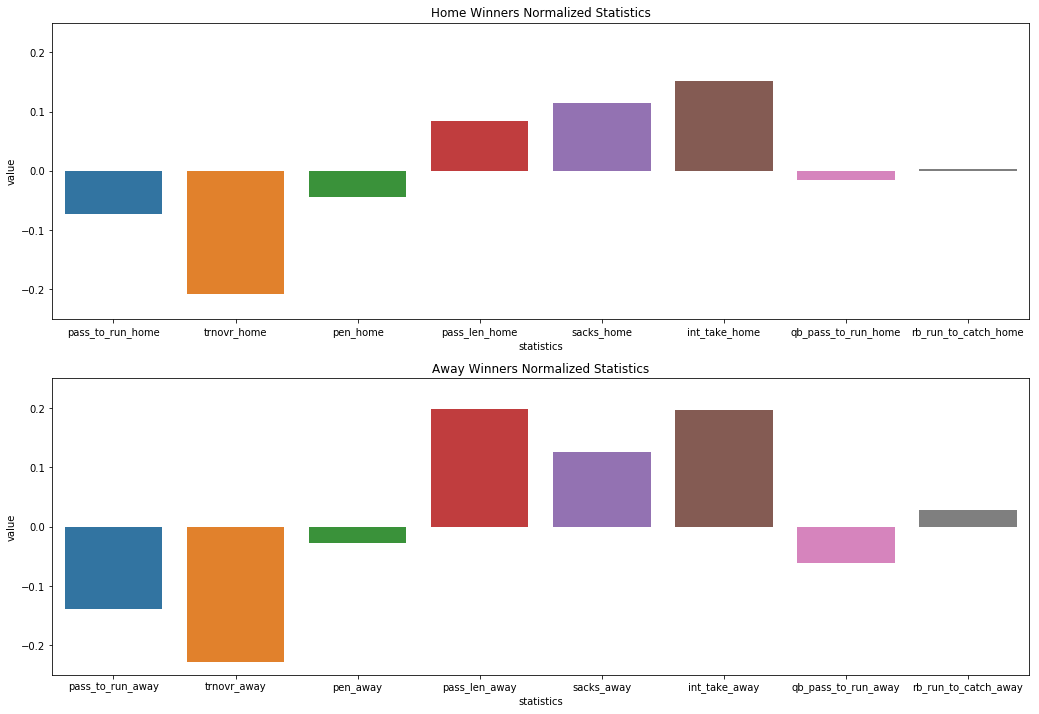

In [76]:
f, axes = plt.subplots(2, 1)
fig = plt.gcf()
fig.set_size_inches(17.5, 12.0)

#Teams that won at home and their common statistics normalized
home_wins = game_clean[game_clean['home_win'] > 0][['pass_to_run_home','trnovr_home','pen_home','pass_len_home','sacks_home','int_take_home','qb_pass_to_run_home','rb_run_to_catch_home']].mean()
home_wins2 = home_wins.to_frame().reset_index()
home_wins2.columns = ['statistics', 'value']

ax1 = sns.barplot(x='statistics', y='value', data=home_wins2, ax=axes[0])
ax1.title.set_text('Home Winners Normalized Statistics')
ax1.set_ylim(-.25,.25)

#Teams that won while away and their common statistics normalized
away_wins = game_clean[game_clean['home_win'] < 0][['pass_to_run_away','trnovr_away','pen_away','pass_len_away','sacks_away','int_take_away','qb_pass_to_run_away','rb_run_to_catch_away']].mean()
away_wins2 = away_wins.to_frame().reset_index()
away_wins2.columns = ['statistics', 'value']

ax2 = sns.barplot(x='statistics', y='value', data=away_wins2, ax=axes[1])
ax2.title.set_text('Away Winners Normalized Statistics')
ax2.set_ylim(-.25,.25)

* We can see that both home and away game winners have very similar distributions
* Away matches Home winners closely but almost all values are more extreme, except for penalties which matter less
* In both distributions turnovers are the most extreme statistics along with takeaways meaning a teams turnover ratio may be a huge indicator of a successful team
* Running more than average is also a sign of a successful team which is counter intuitive relative to the increase of passing yardage over the past 8 years and decrease of rushing yards
* There is a large difference between home and away winner passing lengths

<br>
<br>